In [1]:
import scipy.integrate as spi
import numpy as np
import pylab as pl
%matplotlib inline

# SI Model

In [2]:
beta = 0.8

t_start = 0.0
t_end = 30       # Transmit Time

N = 100


I0 = 1      # Initial Number of Infected
S0 = N - I0    # Initial Number of Susceptible

INPUT = (S0, I0)

In [3]:
%%latex
\begin{align}

\frac{dS(t)}{dt} = -\frac{\beta S(t)I(t)}{N} \\
S + I = N\\

\\

equals  to\\

\\

\frac{dS(t)}{dt} = -\frac{\beta S(t)I(t)}{N} \\

\frac{dI(t)}{dt} = \beta S(t)I(t) \\

\end{align}

<IPython.core.display.Latex object>

In [4]:
def diff_eqs(INP,t):  
    # Y 为微分方程组的3个以t为分母的导数
    Y=np.zeros((2))
    V = INP
    Y[0] = - beta * V[0] * V[1]/N  
    Y[1] = beta * V[0] * V[1]/N
    return Y   # For odeint

In [5]:
t_range = np.arange(t_start, t_end)

RES = spi.odeint(diff_eqs, INPUT, t_range)   # INPUT is the first parameter of func diff_eqs
                                             # t_range is the second parameter of func diff_eqs

Text(0, 0.5, 'Susceptibles and Recovereds')

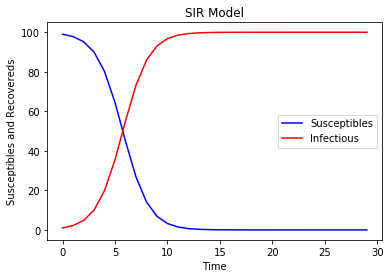

In [6]:
#Ploting
# pl.subplot(211)
pl.plot(RES[:,0], '-b', label='Susceptibles')
pl.plot(RES[:,1], '-r', label='Infecteds')
pl.legend(loc=0)
pl.title('SIR Model')
pl.xlabel('Time')
pl.ylabel('Susceptibles and Recovereds')

# SIR Model

In [7]:
beta = 0.8
gamma = 0.14286

t_start = 0.0
t_end = 30       # Transmit Time

N = 100
R0 = 0
I0 = 1      # Initial Number of Infectious
S0 = N - I0 - R0    # Initial Number of Susceptible

INPUT = (S0, I0, R0)

In [8]:
%%latex
\begin{align}

\frac{dS(t)}{dt} = -\beta S(t)I(t) \\
\frac{dI(t)}{dt} = \beta S(t)I(t) - \gamma I(t) \\
\frac{dR(t)}{dt} = \gamma I(t)

\end{align}

<IPython.core.display.Latex object>

In [9]:
def diff_eqs(INP,t):  
    # Y 为微分方程组的3个以t为分母的导数
    Y = np.zeros((3))
    V = INP
    Y[0] = - beta * V[0] * V[1]/N                    # Y[0] is dS(t)/dt, V[0] is S(t)
    Y[1] = beta * V[0] * V[1]/N - gamma * V[1]       # Y[1] is dI(t)/dt, V[1] is I(t)
    Y[2] = gamma * V[1]                            # Y[2] is dR(t)/dt.
    return Y   # For odeint

In [10]:
t_range = np.arange(t_start, t_end)

RES = spi.odeint(diff_eqs, INPUT, t_range)   # INPUT is the first parameter of func diff_eqs
                                             # t_range is the second parameter of func diff_eqs

Text(0, 0.5, 'Susceptibles, Infectious and Recovereds')

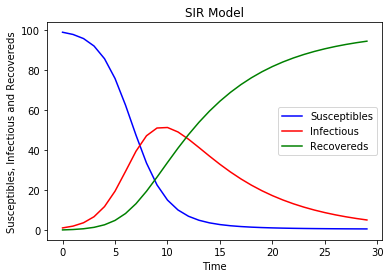

In [11]:
#Ploting
pl.plot(RES[:,0], '-b', label='Susceptibles')
pl.plot(RES[:,1], '-r', label='Infecteds')
pl.plot(RES[:,2], '-g', label='Recovereds')

pl.legend(loc=0)
pl.title('SIR Model')
pl.xlabel('Time')
pl.ylabel('Susceptibles, Infectious and Recovereds')

# SEIR Model

In [58]:
beta = 1.2
gamma = 0.1

t_start = 0.0
t_end = 60       # Transmit Time
t_latent = 7    # Latent Period/Incubation Period

N = 100

I0 = 3      # Initial Number of Infectious
E0 = 0
R0 = 0
S0 = 100 - I0 - E0 - R0    # Initial Number of Susceptible

INPUT = (S0, E0, I0, R0)

In [70]:
%%latex
\begin{align}

\frac{dS}{dt} = -\beta SI \\
\frac{dE}{dt} = \beta SI - \frac{E}{T_{latent}} \\
\frac{dI}{dt} = \frac{E}{T_{latent}} - \gamma I \\
\frac{dR}{dt} = \gamma I

\end{align}

<IPython.core.display.Latex object>

In [60]:
def diff_eqs(INP,t):  
    # Y 为微分方程组的3个以t为分母的导数
    Y= np.zeros((4))
    V = INP
    Y[0] = - beta * V[0] * V[2]/N    
    Y[1] = beta * V[0] * V[2]/N - V[1]/t_latent
    Y[2] = V[1]/t_latent - gamma * V[2]
    Y[3] = gamma * V[2]
    return Y   # For odeint

In [61]:
t_range = np.arange(t_start, t_end)

RES = spi.odeint(diff_eqs, INPUT, t_range)   # INPUT is the first parameter of func diff_eqs
                                             # t_range is the second parameter of func diff_eqs

Text(0, 0.5, 'Susceptibles, Infectious and Recovereds')

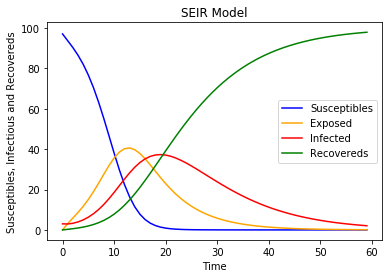

In [63]:
#Ploting
pl.plot(RES[:,0], '-b', label='Susceptibles')
pl.plot(RES[:,1], 'orange', label='Exposeds')
pl.plot(RES[:,2], '-r', label='Infecteds')
pl.plot(RES[:,3], '-g', label='Recovereds')

pl.legend(loc=0)
pl.title('SEIR Model')
pl.xlabel('Time')
pl.ylabel('Susceptibles, Infectious and Recovereds')